In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
results = np.load('../Results/results_midEps.npy',allow_pickle=True).item()

In [4]:
Cd_true = results['Cd_true']
Cl_true = results['Cl_true']
Cd_32 = results['Cd_32']
Cl_32 = results['Cl_32']
Cd_64 = results['Cd_64']
Cl_64 = results['Cl_64']
Cd_128 = results['Cd_128']
Cl_128 = results['Cl_128']
Cd_256 = results['Cd_256']
Cl_256 = results['Cl_256']

tau = results['tau']
dt = results['dt']
t = np.linspace(dt,tau,int(tau/dt))
n_samp = len(Cd_true)

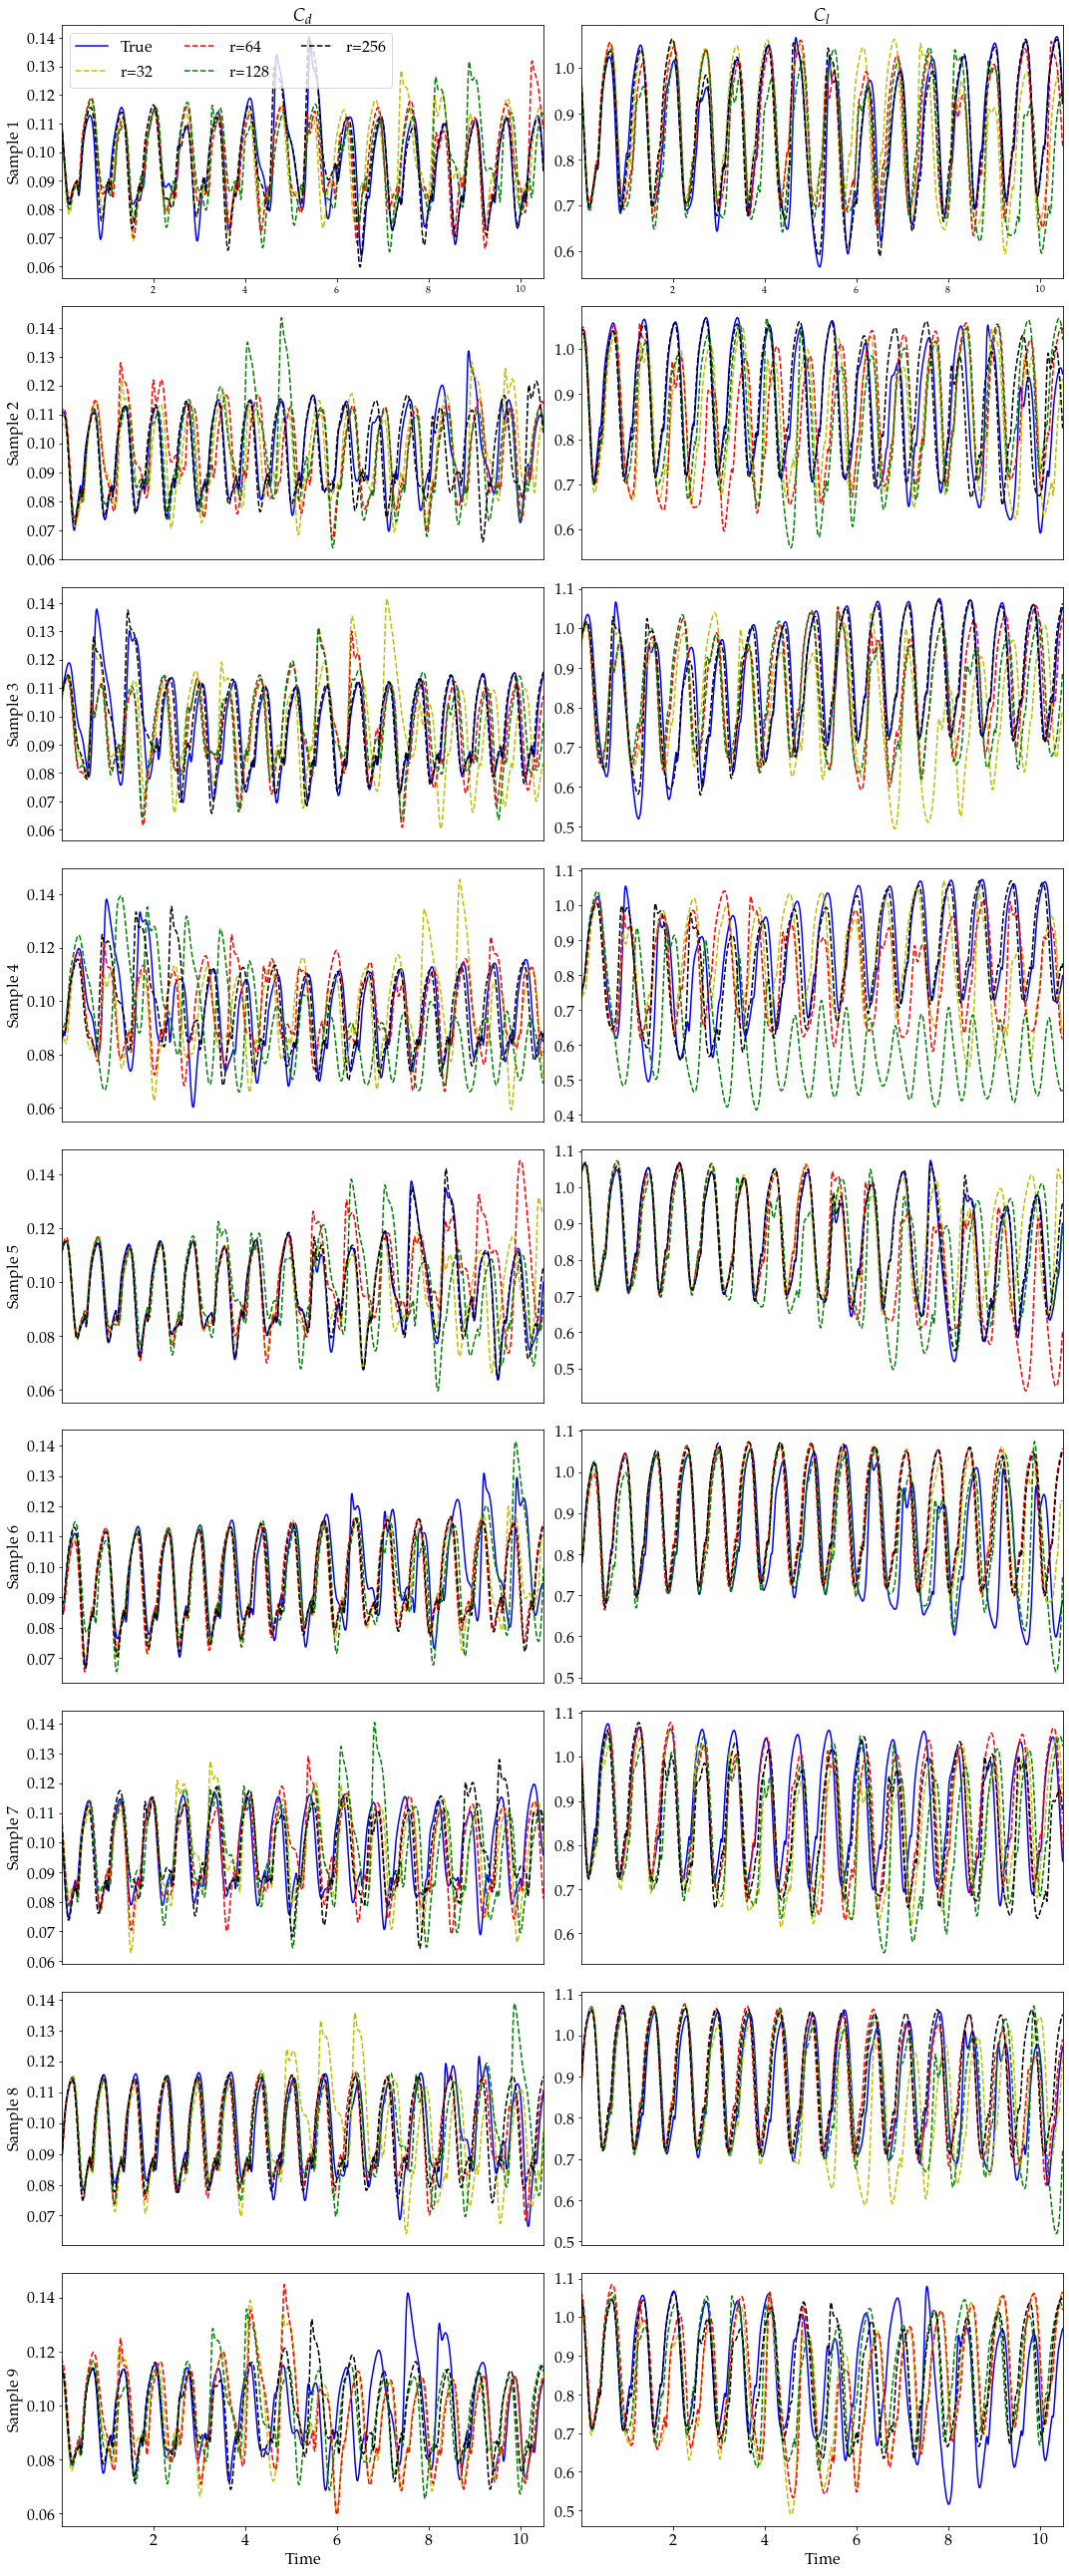

In [5]:
sample_nums = np.arange(1,10)

figure(figsize = (15,4*len(sample_nums)))
label_fs = 16

for j in range(len(sample_nums)):
    
    sample_num = sample_nums[j]
    
    subplot(len(sample_nums),2,2*j+1)
    plot(t,Cd_true[sample_num][1:], 'b', label='True')
    plot(t,Cd_32[sample_num][1:], 'y--', label='r=32')
    plot(t,Cd_64[sample_num][1:], 'r--', label='r=64')
    plot(t,Cd_128[sample_num][1:], 'g--', label='r=128')
    plot(t,Cd_256[sample_num][1:], 'k--', label='r=256')
    xlim(t[0],t[-1])
    
    yticks(fontsize = label_fs)
    ylabel(r'Sample '+str(sample_num), fontsize = label_fs)
    
    if j == 0: 
        title(r'$C_d$', fontsize = label_fs+2)
        legend(loc = 'upper left', ncol=3, fontsize = label_fs)
    elif j == len(sample_nums)-1:
        xticks(fontsize = label_fs)
        xlabel('Time', fontsize = label_fs)
    else:
        xticks([])

    subplot(len(sample_nums),2,2*j+2)
    plot(t,Cl_true[sample_num][1:], 'b', label='True')
    plot(t,Cl_32[sample_num][1:], 'y--', label='r=32')
    plot(t,Cl_64[sample_num][1:], 'r--', label='r=64')
    plot(t,Cl_128[sample_num][1:], 'g--', label='r=128')
    plot(t,Cl_256[sample_num][1:], 'k--', label='r=256')
    xlim(t[0],t[-1])
#     ylim([0.055,0.15 ])
    
    yticks(fontsize = label_fs)    
    if j == 0: 
        title(r'$C_l$', fontsize = label_fs+2)
    elif j == len(sample_nums)-1:
        xticks(fontsize = label_fs)
        xlabel('Time', fontsize = label_fs)
    else:
        xticks([])
    
tight_layout()

In [6]:
Cd_err_32 = np.mean([np.abs(Cd_true[j][1:] - Cd_32[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_err_64 = np.mean([np.abs(Cd_true[j][1:] - Cd_64[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_err_128 = np.mean([np.abs(Cd_true[j][1:] - Cd_128[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)
Cd_err_256 = np.mean([np.abs(Cd_true[j][1:] - Cd_256[j][1:])/np.std(Cd_true[j][1:]) for j in range(n_samp)], axis=0)

Cl_err_32 = np.mean([np.abs(Cl_true[j][1:] - Cl_32[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_err_64 = np.mean([np.abs(Cl_true[j][1:] - Cl_64[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_err_128 = np.mean([np.abs(Cl_true[j][1:] - Cl_128[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)
Cl_err_256 = np.mean([np.abs(Cl_true[j][1:] - Cl_256[j][1:])/np.std(Cl_true[j][1:]) for j in range(n_samp)], axis=0)

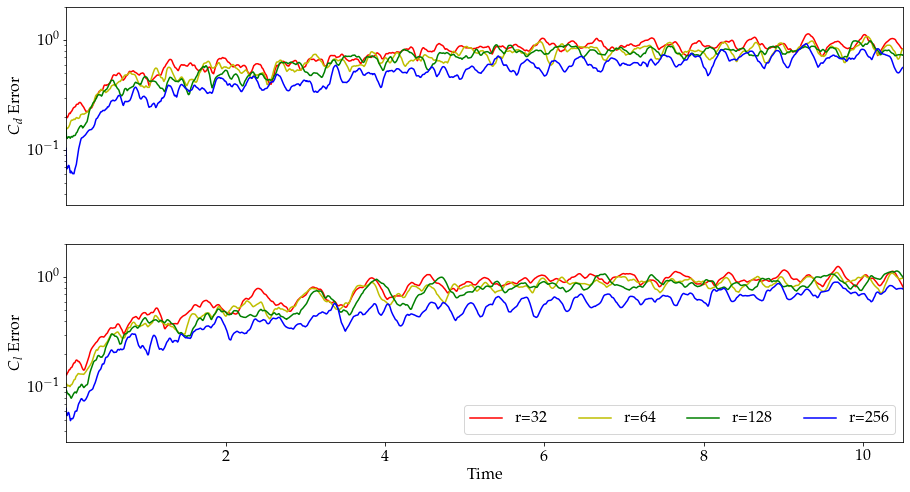

In [7]:
figure(figsize = (15,8))
label_fs = 16

subplot(2,1,1)
semilogy(t,Cd_err_32, 'r', label='r=32')
semilogy(t,Cd_err_64, 'y', label='r=64')
semilogy(t,Cd_err_128, 'g', label='r=128')
semilogy(t,Cd_err_256, 'b', label='r=256')
xlim([t[0],t[-1]])
xticks([])
yticks(fontsize = label_fs)
ylabel(r'$C_d$ Error', fontsize = label_fs)
ylim([10**-1.5, 2])

subplot(2,1,2)
semilogy(t,Cl_err_32, 'r', label='r=32')
semilogy(t,Cl_err_64, 'y', label='r=64')
semilogy(t,Cl_err_128, 'g', label='r=128')
semilogy(t,Cl_err_256, 'b', label='r=256')
xlim([t[0],t[-1]])
ylim([10**-1.5, 2])

xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$C_l$ Error', fontsize = label_fs)
xlabel(r'Time', fontsize = label_fs)
legend(loc = 'lower right', ncol=4, fontsize = label_fs)